# Intro data science - Portfolio assignment 18: Train a decision tree on your own dataset (numerical)

30 min: Train a decision tree to predict one of the numerical columns of your own dataset.

- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accuracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [2]:
import pandas as pd

students = pd.read_csv('datasets/StudentsPerformance.csv')

In [3]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Correlations

Before we do anything, it would be interesting to check the correlations between the columns. This way we can find out which feature would be good to use in our predictions.

In [5]:
students.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


All numerical values in this dataset are scores, and they all seem to be strongly correlated. This means that students who perform well in one test also perform well in the other tests. For our prediction we'll go with the two strongest correlated columns: writing and reading.

## Splitting the dataset

We will split the dataset 70/30 so we have a train dataset and a test dataset.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
students_train, students_test = train_test_split(students, test_size=0.3,
                                                stratify=students['gender'],
                                                random_state=42)

print(students_train.shape, students_test.shape)

(700, 8) (300, 8)


## Fitting the DecisionTreeRegressor

We will be predicting the student's writing score based on the reading score. In the Pearson's correlation table we saw that these two variables had the strongest correlation (even though all correlations were pretty strong!)

In [13]:
from sklearn.tree import DecisionTreeRegressor

features = ['reading score']
dt_regression = DecisionTreeRegressor(max_depth=2) # increase max_depth to see effect in the plot
dt_regression.fit(students_train[features], students_train['writing score'])

DecisionTreeRegressor(max_depth=2)

In [10]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception('The amount of predictions did not equal the amount of actuals.')
        
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [14]:
predictionsOnTrainSet = dt_regression.predict(students_train[features])
predictionsOnTestSet = dt_regression.predict(students_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainSet, students_train['writing score'])
rmseTest = calculate_rmse(predictionsOnTestSet, students_test['writing score'])

print('RMSE on training set ' + str(rmseTrain))
print('RMSE on test set ' + str(rmseTest))

RMSE on training set 6.740064503198754
RMSE on test set 6.88413119525909


In [15]:
from sklearn import tree

def plot_tree_regression(model, features):
    # generate plot data
    graph = tree.plot_tree(model,
                          feature_names=features,
                          filled=True)
    
    # display in the notebook
    return graph

[Text(1116.0, 1812.0, 'reading score <= 68.5\nmse = 233.884\nsamples = 700\nvalue = 68.331'),
 Text(558.0, 1087.2, 'reading score <= 50.5\nmse = 114.014\nsamples = 329\nvalue = 55.83'),
 Text(279.0, 362.39999999999986, 'mse = 72.937\nsamples = 68\nvalue = 40.721'),
 Text(837.0, 362.39999999999986, 'mse = 49.742\nsamples = 261\nvalue = 59.766'),
 Text(1674.0, 1087.2, 'reading score <= 81.5\nmse = 78.68\nsamples = 371\nvalue = 79.418'),
 Text(1395.0, 362.39999999999986, 'mse = 28.123\nsamples = 218\nvalue = 74.032'),
 Text(1953.0, 362.39999999999986, 'mse = 50.501\nsamples = 153\nvalue = 87.092')]

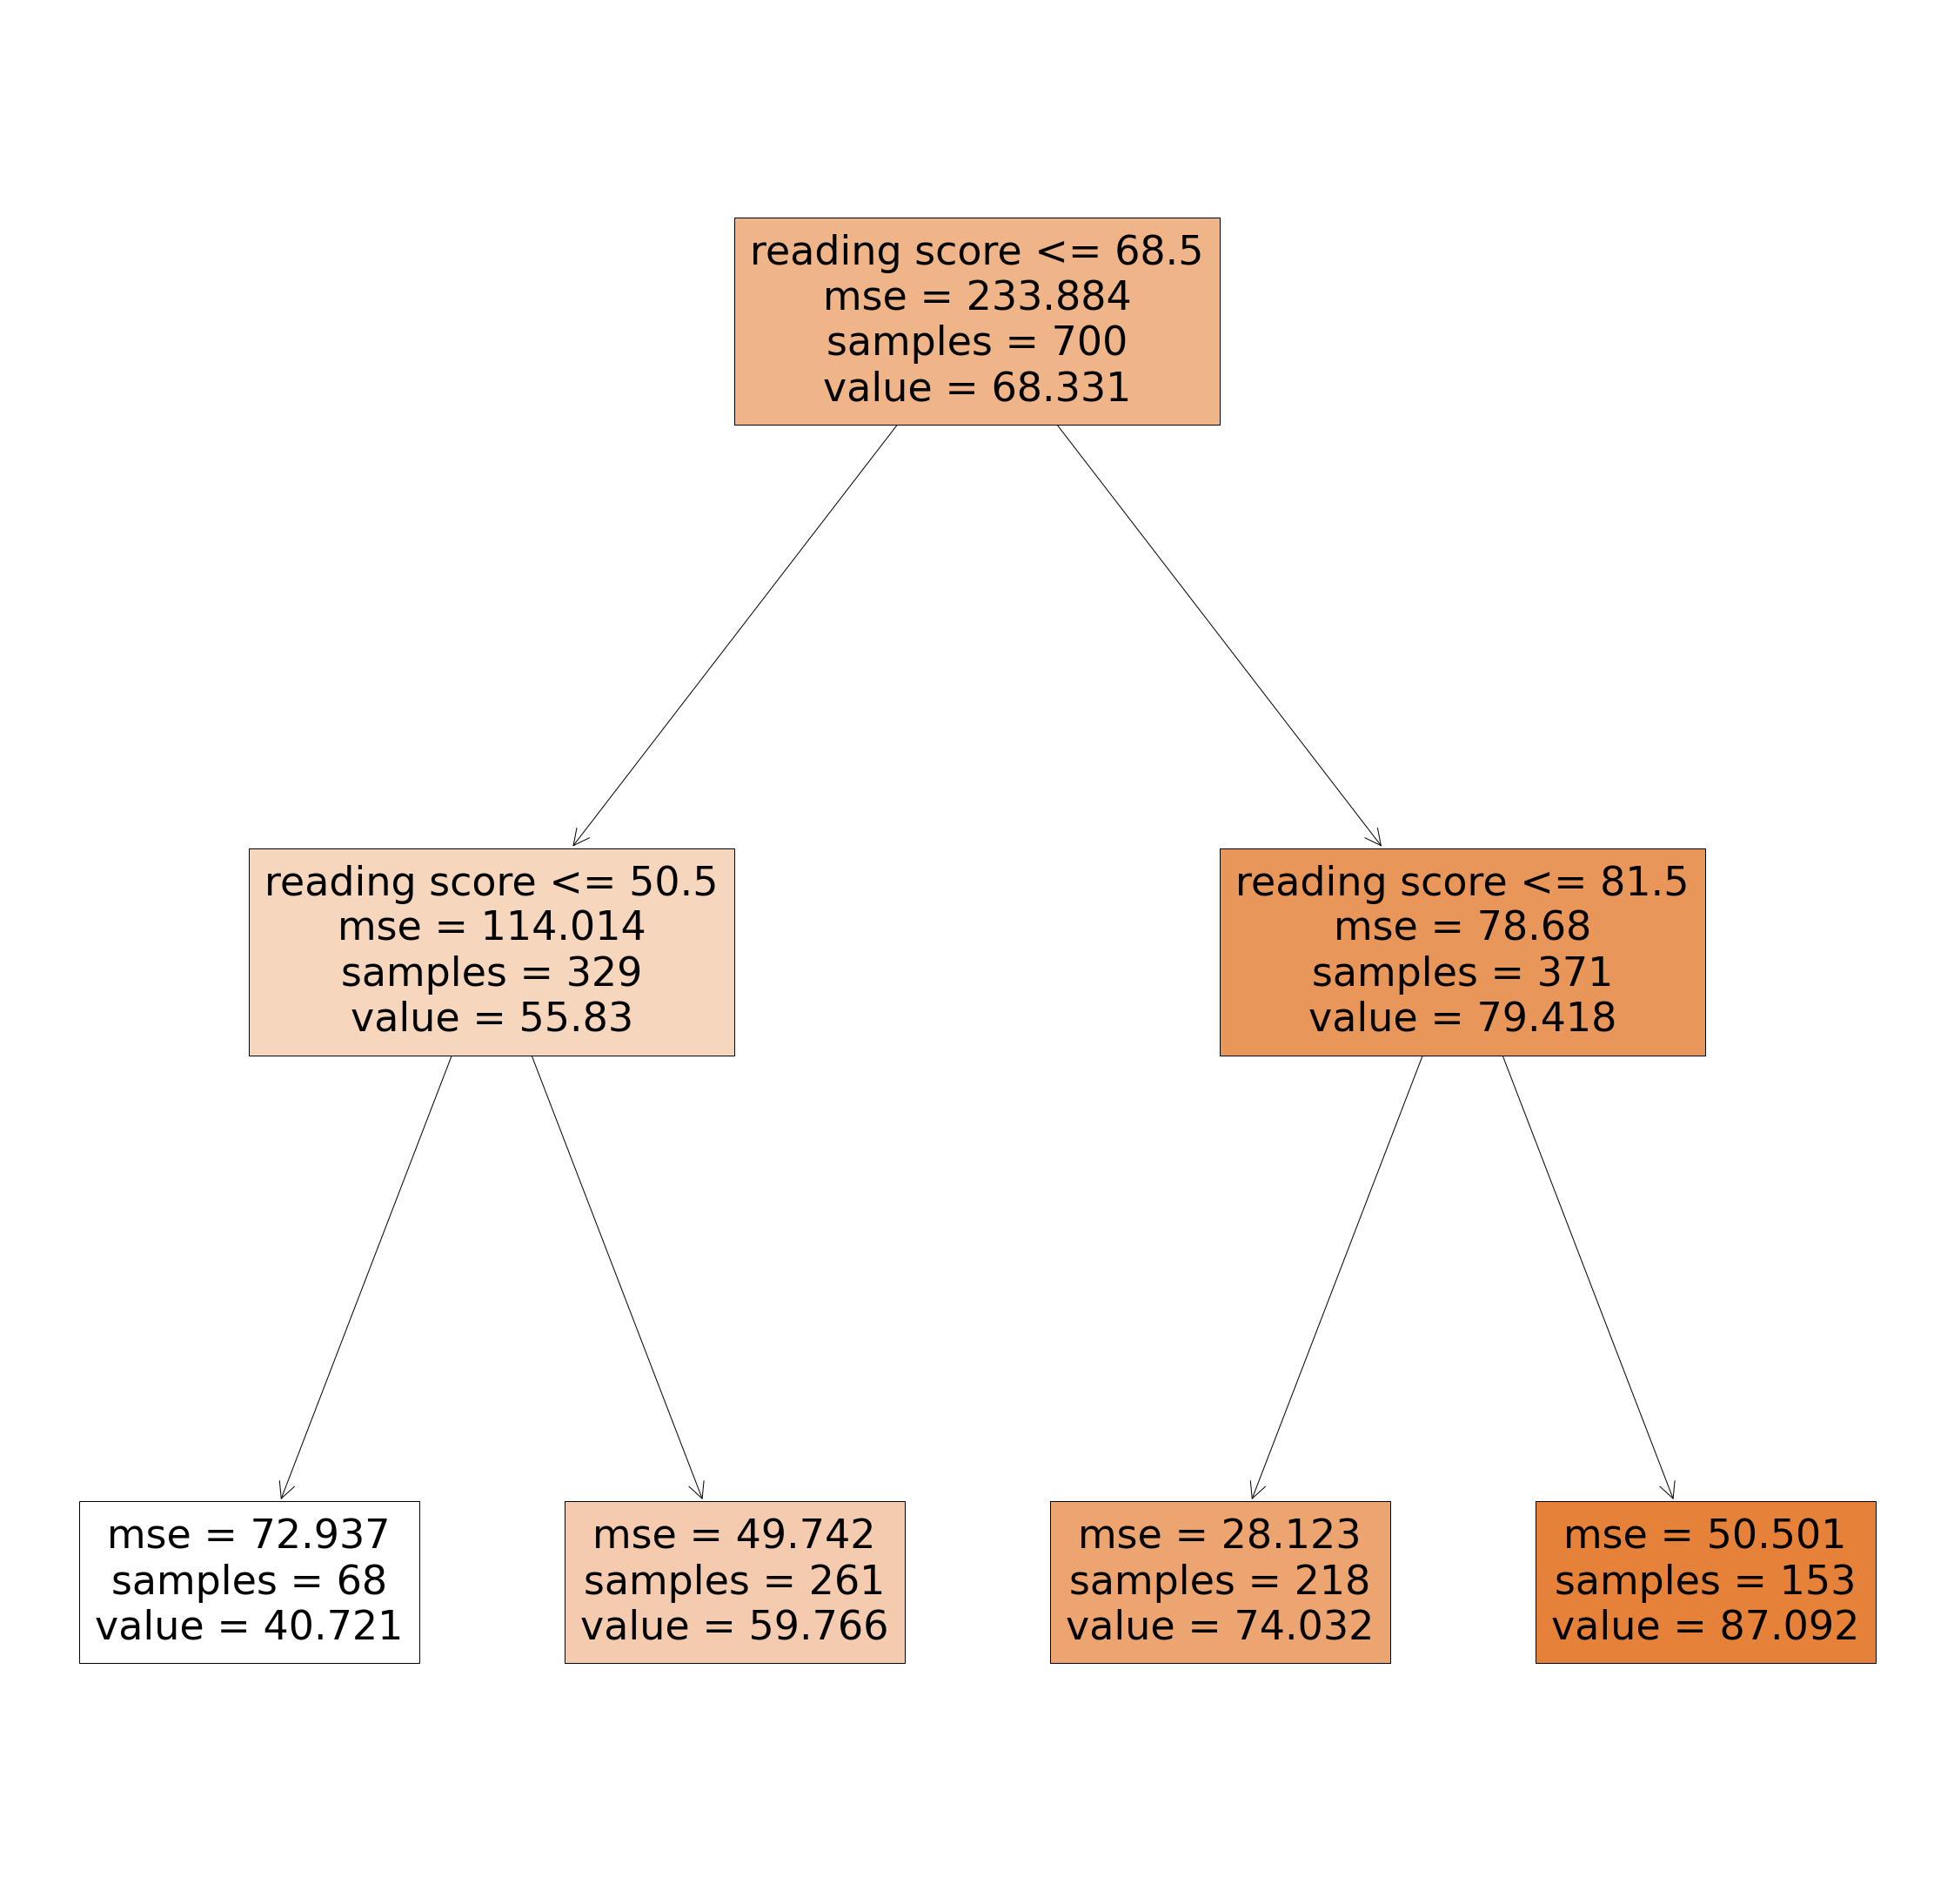

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

plot_tree_regression(dt_regression, features)